# Question 2: Classification : Convolutional Neural Networks

###  2.1: Design and Implementation Choices of your Model (25points)

#### CNN Based Approach

In [1]:
# Importing libraries

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
#%tensorflow_version 1.x
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

Using TensorFlow backend.


In [0]:
# Reading the csv 
data = pd.read_csv('/content/drive/My Drive/train.csv')
data_test = pd.read_csv('/content/drive/My Drive/testX.csv')

In [3]:
data.head()

,Id,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Dropping Id and Label columns from the train data

train_data = data.drop(['Id','Label'],axis=1)

In [5]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,76,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.shape

(60000, 784)

In [7]:
data_test.head()

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [0]:
# Droping the Id column from test data

test_data = data_test.drop('Id',axis=1)

In [9]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [10]:
test_data.shape

(10000, 784)

In [11]:
#Checking for null values in test data
test_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

In [12]:
#Checking for null values in train data
train_data.isnull().sum()

1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 784, dtype: int64

In [13]:
# Finding the unique values of lables in the train dataset
data['Label'].unique()

array([4, 0, 1, 2, 3])

In [14]:
# Finding the unique values count of lables in the train dataset
data['Label'].value_counts()

4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

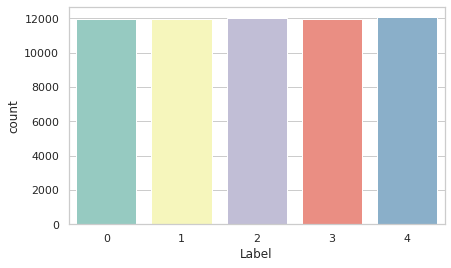

In [15]:
#plot between the count of the target values
sns.countplot(x="Label", data=data,  palette="Set3")
plt.show()

In [0]:
# Normalizing the data

train_data = train_data/255.0
test_data = test_data/255.0

In [0]:
# Reshaping the data

train_data=train_data.values.reshape(len(train_data),28,28,1)
test_data=test_data.values.reshape(len(test_data),28,28,1)

In [18]:
train_data[0].shape

(28, 28, 1)

In [19]:
test_data[0].shape

(28, 28, 1)

In [0]:
x = train_data
y = data['Label']

In [0]:
#split the training data into train and validate  

x_train, x_validate, y_train, y_validate = train_test_split(
    x, y, test_size=0.1, random_state=42,
)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_validate.shape)
print(y_validate.shape)

(54000, 28, 28, 1)
(54000,)
(6000, 28, 28, 1)
(6000,)


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

calls = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [0]:
# Creating a CNN model

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Dense(5, activation='softmax'))


In [26]:
# Summary of the CNN model

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)       

In [0]:
# Compiling the CNN model
import keras

cnn.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer=Adam(lr = 0.001),
        metrics=['accuracy']
    )

In [29]:
# Training the CNN model

cnn_1 = cnn.fit(
        x_train, y_train,
        batch_size=256,
        epochs=100, verbose=1,
        validation_data=(x_validate, y_validate)
    )

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 10s 192us/step - loss: 0.3605 - accuracy: 0.8573 - val_loss: 0.3636 - val_accuracy: 0.8493
Epoch 2/100
54000/54000 [==============================] - 10s 191us/step - loss: 0.3558 - accuracy: 0.8591 - val_loss: 0.3704 - val_accuracy: 0.8480
Epoch 3/100
54000/54000 [==============================] - 10s 191us/step - loss: 0.3425 - accuracy: 0.8623 - val_loss: 0.5340 - val_accuracy: 0.7983
Epoch 4/100
54000/54000 [==============================] - 10s 191us/step - loss: 0.3312 - accuracy: 0.8687 - val_loss: 0.3435 - val_accuracy: 0.8572
Epoch 5/100
54000/54000 [==============================] - 10s 190us/step - loss: 0.3279 - accuracy: 0.8709 - val_loss: 0.3558 - val_accuracy: 0.8517
Epoch 6/100
54000/54000 [==============================] - 10s 191us/step - loss: 0.3147 - accuracy: 0.8745 - val_loss: 0.5886 - val_accuracy: 0.7753
Epoch 7/100
54000/54000 [==========================

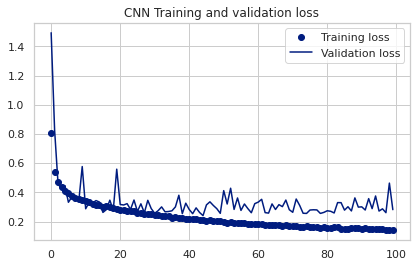

In [27]:
# Plotting the training and validation loss
loss = cnn_1.history['loss']
val_loss = cnn_1.history['val_loss']

epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('CNN Training and validation loss')
plt.legend()
plt.show()

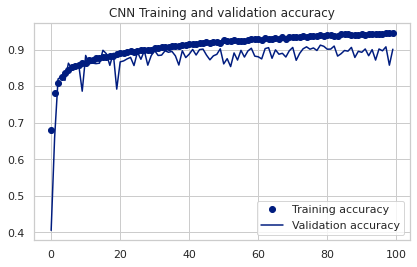

In [28]:
# Plotting the training and validation accuracy
accuracy = cnn_1.history['accuracy']
val_accuracy = cnn_1.history['val_accuracy']
epochs = range(100)
plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('CNN Training and validation accuracy')
plt.legend()
plt.show()

In [29]:
cnn_scores = cnn.evaluate(x_validate, y_validate, verbose=1)
print('Validation loss:', cnn_scores[0])
print('Validation accuracy:', cnn_scores[1])

6000/6000 [==============================] - 1s 132us/step
Validation loss: 0.2813038973510265
Validation accuracy: 0.9010000228881836


In [30]:
# Predicting the result of the model using the test data

prediction_cnn= cnn.predict_classes(test_data)
prediction_cnn

array([3, 4, 1, ..., 4, 2, 2])

In [31]:
# Classification Report
y_cnn = cnn.predict(x_validate)
y_val = np.argmax(y_cnn, axis = 1)
labels = ['0', '1', '2', '3', '4']
print(classification_report(y_validate, y_val, target_names = labels))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1190
           1       0.89      0.91      0.90      1230
           2       0.89      0.82      0.85      1182
           3       0.87      0.84      0.85      1175
           4       0.90      0.97      0.93      1223

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



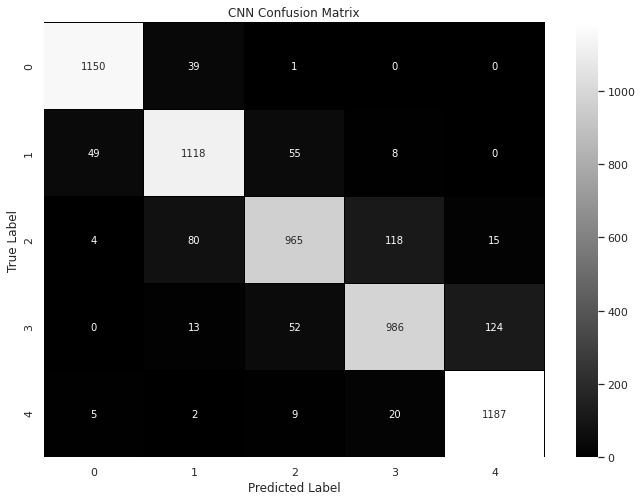

In [32]:
# Confusion Matrix

confusion_mtx = confusion_matrix(y_validate, y_val) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Confusion Matrix")
plt.show()

In [33]:
# Saving the output to the csv

predict = pd.DataFrame(prediction_cnn, columns=['Label'])
dataset = [data_test['Id'],predict]
final_df = pd.concat(dataset,axis=1)

print(final_df)

from google.colab import files

final_df.to_csv('cnn_fi.csv',index=False, header=True)
files.download('cnn_fi.csv')

        Id  Label
0        0      3
1        1      4
2        2      1
3        3      1
4        4      2
...    ...    ...
9995  9995      1
9996  9996      1
9997  9997      4
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


#### Hyper Parameter Tuning (Keras Tuner)

In [30]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 6.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=0328afe711e5846790dbc1226dd8fd873eb5db0c60f4467fce430f2f4005590c
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=eac4b8b44ebb4817ba3a2f70b8baedc984c6d73d35afa9e2ee92750de444f8ab
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
# Building a model with hyper parameters

def build_model(hp):
  hp_model = keras.Sequential()
  hp_model.add(keras.layers.Conv2D(filters=hp.Int('filter_1',min_value=32,max_value=256,step=16), 
                                   kernel_size=hp.Choice('kernel_1', values = [3,5]),
                                    activation='relu', input_shape=(28,28,1)))
  hp_model.add(keras.layers.Conv2D(filters=hp.Int('filter_2', min_value=32, max_value=256, step=16),
                                    kernel_size=hp.Choice('kernel_2', values = [3,5]),
                                    activation='relu'))
  hp_model.add(keras.layers.MaxPool2D((2, 2)))
  hp_model.add(keras.layers.Dropout(0.2))
  hp_model.add(keras.layers.Flatten())
  hp_model.add(keras.layers.Dense(units=hp.Int('dense_unit', min_value=32, max_value=256, step=16),
                                  activation='relu'))
  hp_model.add(keras.layers.Dense(5, activation='softmax'))
  hp_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return hp_model

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output')

In [33]:
tuner_search.search(x_train, y_train,epochs=5,validation_data=(x_validate, y_validate),callbacks=[calls])

Epoch 1/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.6663 - accuracy: 0.7363 - val_loss: 0.5157 - val_accuracy: 0.7895
Epoch 2/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.5091 - accuracy: 0.7922 - val_loss: 0.5039 - val_accuracy: 0.7995
Epoch 3/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4900 - accuracy: 0.8001 - val_loss: 0.4394 - val_accuracy: 0.8138
Epoch 4/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4726 - accuracy: 0.8084 - val_loss: 0.4075 - val_accuracy: 0.8357
Epoch 5/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4597 - accuracy: 0.8153 - val_loss: 0.4797 - val_accuracy: 0.7980


Epoch 1/5
1688/1688 [==============================] - 28s 17ms/step - loss: 0.7257 - accuracy: 0.7535 - val_loss: 0.5569 - val_accuracy: 0.7568
Epoch 2/5
1688/1688 [==============================] - 28s 17ms/step - loss: 0.4883 - accuracy: 0.8004 - val_loss: 0.4213 - val_accuracy: 0.8332
Epoch 3/5
1688/1688 [==============================] - 28s 17ms/step - loss: 0.4624 - accuracy: 0.8117 - val_loss: 0.4260 - val_accuracy: 0.8245
Epoch 4/5
1688/1688 [==============================] - 28s 17ms/step - loss: 0.4553 - accuracy: 0.8168 - val_loss: 0.4266 - val_accuracy: 0.8318
Epoch 5/5
1688/1688 [==============================] - 28s 17ms/step - loss: 0.4445 - accuracy: 0.8221 - val_loss: 0.4848 - val_accuracy: 0.7937


Epoch 1/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.6933 - accuracy: 0.7082 - val_loss: 0.5432 - val_accuracy: 0.7752
Epoch 2/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.4915 - accuracy: 0.8024 - val_loss: 0.4896 - val_accuracy: 0.7975
Epoch 3/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.4328 - accuracy: 0.8288 - val_loss: 0.4000 - val_accuracy: 0.8427
Epoch 4/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3957 - accuracy: 0.8449 - val_loss: 0.3878 - val_accuracy: 0.8443
Epoch 5/5
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3701 - accuracy: 0.8542 - val_loss: 0.3777 - val_accuracy: 0.8495


Epoch 1/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.6560 - accuracy: 0.7253 - val_loss: 0.5253 - val_accuracy: 0.7877
Epoch 2/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4541 - accuracy: 0.8200 - val_loss: 0.4369 - val_accuracy: 0.8187
Epoch 3/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3968 - accuracy: 0.8413 - val_loss: 0.3526 - val_accuracy: 0.8577
Epoch 4/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3667 - accuracy: 0.8542 - val_loss: 0.3670 - val_accuracy: 0.8508
Epoch 5/5
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3403 - accuracy: 0.8651 - val_loss: 0.3864 - val_accuracy: 0.8490


Epoch 1/5
1688/1688 [==============================] - 26s 15ms/step - loss: 0.6033 - accuracy: 0.7500 - val_loss: 0.4350 - val_accuracy: 0.8255
Epoch 2/5
1688/1688 [==============================] - 26s 15ms/step - loss: 0.4161 - accuracy: 0.8327 - val_loss: 0.4191 - val_accuracy: 0.8282
Epoch 3/5
1688/1688 [==============================] - 26s 15ms/step - loss: 0.3626 - accuracy: 0.8550 - val_loss: 0.3541 - val_accuracy: 0.8568
Epoch 4/5
1688/1688 [==============================] - 26s 15ms/step - loss: 0.3282 - accuracy: 0.8679 - val_loss: 0.3927 - val_accuracy: 0.8353
Epoch 5/5
1688/1688 [==============================] - 26s 15ms/step - loss: 0.2984 - accuracy: 0.8814 - val_loss: 0.3190 - val_accuracy: 0.8702


INFO:tensorflow:Oracle triggered exit


In [0]:
# Selecting the best model with the best tuned parameters

model_hp = tuner_search.get_best_models(num_models=1)[0]

In [35]:
tuner_search.results_summary()

In [36]:
# Summary of the hyper tuned model

model_hp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 160)       4160      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       368896    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 224)               6938848   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

In [37]:
hp_best = model_hp.fit(x_train,y_train,batch_size=512,
              epochs=30,verbose=1,
              validation_data = (x_validate,y_validate),
              callbacks=[calls]
)

Epoch 1/30
106/106 [==============================] - 17s 162ms/step - loss: 0.2467 - accuracy: 0.9065 - val_loss: 0.2822 - val_accuracy: 0.8873
Epoch 2/30
106/106 [==============================] - 16s 155ms/step - loss: 0.2371 - accuracy: 0.9108 - val_loss: 0.2802 - val_accuracy: 0.8893
Epoch 3/30
106/106 [==============================] - 17s 157ms/step - loss: 0.2333 - accuracy: 0.9113 - val_loss: 0.2785 - val_accuracy: 0.8887
Epoch 4/30
106/106 [==============================] - 17s 157ms/step - loss: 0.2305 - accuracy: 0.9125 - val_loss: 0.2756 - val_accuracy: 0.8902
Epoch 5/30
106/106 [==============================] - 17s 157ms/step - loss: 0.2275 - accuracy: 0.9143 - val_loss: 0.2751 - val_accuracy: 0.8898
Epoch 6/30
106/106 [==============================] - 17s 157ms/step - loss: 0.2238 - accuracy: 0.9160 - val_loss: 0.2754 - val_accuracy: 0.8873
Epoch 7/30
106/106 [==============================] - 17s 158ms/step - loss: 0.2213 - accuracy: 0.9169 - val_loss: 0.2739 - val_ac

In [38]:
# Predicting the result for the test data

pred_hp = model_hp.predict_classes(test_data)
pred_hp

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4, 4, 0, ..., 2, 2, 2])

In [39]:
hp_scores = model_hp.evaluate(x_validate, y_validate, verbose=1)
print('Validation loss:', hp_scores[0])
print('Validation accuracy:', hp_scores[1])

188/188 [==============================] - 1s 6ms/step - loss: 0.2570 - accuracy: 0.8945
Validation loss: 0.2569722831249237
Validation accuracy: 0.8945000171661377


In [40]:
# Saving the output to the csv

predict_hp = pd.DataFrame(pred_hp, columns=['Label'])
dataset_1 = [data_test['Id'],predict_hp]
final_df_1 = pd.concat(dataset_1,axis=1)

print(final_df_1)

from google.colab import files

final_df_1.to_csv('hp.csv',index=False, header=True)
files.download('hp.csv')

        Id  Label
0        0      4
1        1      4
2        2      0
3        3      1
4        4      0
...    ...    ...
9995  9995      1
9996  9996      1
9997  9997      2
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


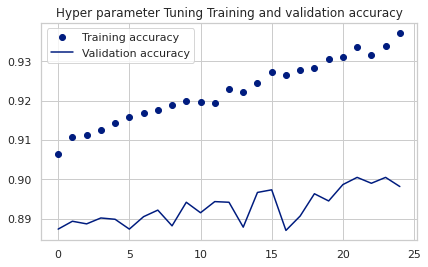

In [44]:
# Plotting the training and validation accuracy

accuracy = hp_best.history['accuracy']
val_accuracy = hp_best.history['val_accuracy']
epochs = range(len(accuracy))
plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Hyper parameter Tuning Training and validation accuracy')
plt.legend()
plt.show()

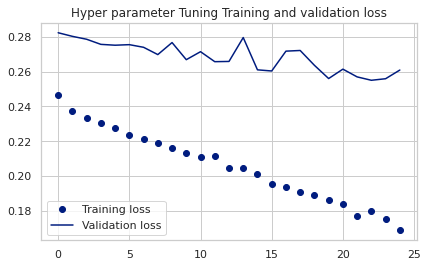

In [45]:
# Plotting the training and validation loss

loss = hp_best.history['loss']
val_loss = hp_best.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Hyper parameter Tuning Training and validation loss')
plt.legend()
plt.show()

In [46]:
# Classification Report
y_hp = model_hp.predict(x_validate)
y_val_hp = np.argmax(y_hp, axis = 1)
labels = ['0', '1', '2', '3', '4']
print(classification_report(y_validate, y_val_hp, target_names = labels))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1190
           1       0.88      0.88      0.88      1230
           2       0.84      0.86      0.85      1182
           3       0.87      0.85      0.86      1175
           4       0.93      0.94      0.93      1223

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



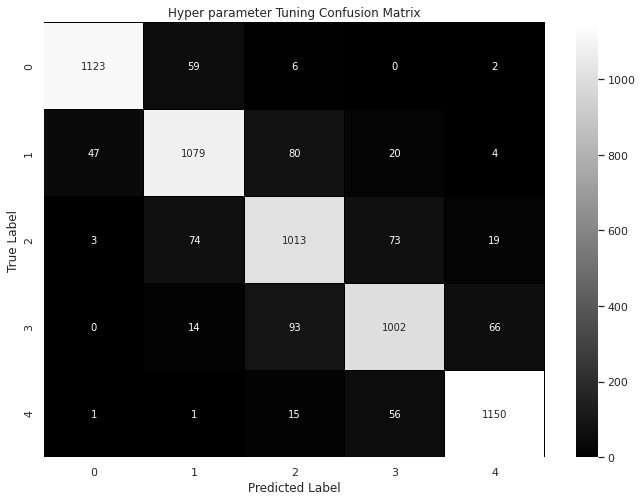

In [47]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_val_hp) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Hyper parameter Tuning Confusion Matrix")
plt.show()

#### Autoencoders

In [0]:
# Importing libraries

from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical

In [0]:
batch_size = 512
epochs = 100
x, y = 28, 28
input_img = Input(shape = (x, y, 1))
classes = 5

In [0]:

train_data_1,valid_1,train_2,valid_2 = train_test_split(train_data,
                                                             train_data,
                                                             test_size=0.1,
                                                             random_state=42)

In [0]:
def encoder(input_img):

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) 
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) 
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) 
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) 
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) 
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) 
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) 
    return decoded

In [0]:
# compiling the model

ae = Model(input_img, decoder(encoder(input_img)))
ae.compile(loss='mean_squared_error', optimizer = RMSprop())

In [53]:
ae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1849

In [54]:
# Training the model

ae_train = ae.fit(train_data_1, 
                  train_2, 
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(valid_1, valid_2),
                  callbacks=[calls])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 31s 567us/step - loss: 0.0477 - val_loss: 0.1272
Epoch 2/100
54000/54000 [==============================] - 26s 486us/step - loss: 0.0213 - val_loss: 0.1244
Epoch 3/100
54000/54000 [==============================] - 26s 486us/step - loss: 0.0154 - val_loss: 0.0374
Epoch 4/100
54000/54000 [==============================] - 26s 486us/step - loss: 0.0128 - val_loss: 0.0174
Epoch 5/100
54000/54000 [==============================] - 26s 485us/step - loss: 0.0111 - val_loss: 0.0113
Epoch 6/100
54000/54000 [==============================] - 26s 485us/step - loss: 0.0098 - val_loss: 0.0103
Epoch 7/100
54000/54000 [==============================] - 26s 486us/step - loss: 0.0089 - val_loss: 0.0116
Epoch 8/100
54000/54000 [==============================] - 26s 486us/step - loss: 0.0082 - val_loss: 0.0089
Epoch 9/100
54000/54000 [==============================] - 26s 486us/step - loss: 0.007

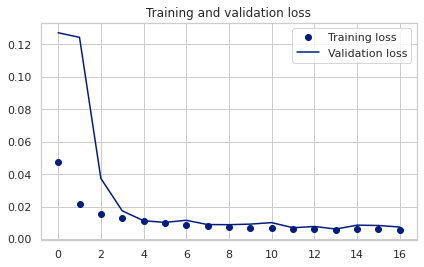

In [55]:
# loss plot

loss = ae_train.history['loss']
val_loss = ae_train.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# saving weights

ae.save_weights('ae.h5')

In [0]:
ds = [data['Label']]
final_ds_label = pd.concat(ds,axis=1)
final_ds_label

tr_label = np.array(final_ds_label, dtype='float32')

In [58]:
# Categorical to one-hot encoding
train_Y_one_hot = to_categorical(tr_label)
test_Y_one_hot = to_categorical(y_validate)

# Display the change for category label using one-hot encoding
print('Original label:', tr_label[0])
print('Conversion:', train_Y_one_hot[0])

Original label: [4.]
Conversion: [0. 0. 0. 0. 1.]


In [0]:
train_3,valid_3,tr_label,valid_label = train_test_split(train_data,
                                                           train_Y_one_hot,
                                                           test_size=0.1,
                                                           random_state=42)

In [0]:
def encoder(input_img):
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) 
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

In [0]:
def fullyConnected(enco):
    fn = Flatten()(enco)
    den = Dense(128, activation='relu')(fn)
    output = Dense(5, activation='softmax')(den)
    return output

In [0]:
ec = encoder(input_img)
final_model = Model(input_img,fullyConnected(ec))

In [0]:
for l1,l2 in zip(final_model.layers[:19],ae.layers[0:19]):
    l1.set_weights(l2.get_weights())

In [0]:
for layer in final_model.layers[0:19]:
    layer.trainable = False

In [0]:
final_model.compile(
                   loss='categorical_crossentropy', 
                   optimizer=Adam(),
                   metrics=['accuracy']
                   )

In [66]:
final_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        1849

In [70]:
ct = final_model.fit(
                      train_3, 
                      tr_label, 
                      batch_size=64,
                      epochs=100,
                      verbose=1,
                      validation_data=(valid_3, valid_label),
                      callbacks=[calls]
                      )

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 11s 201us/step - loss: 0.2265 - accuracy: 0.9090 - val_loss: 0.4406 - val_accuracy: 0.8590
Epoch 2/100
54000/54000 [==============================] - 11s 203us/step - loss: 0.2062 - accuracy: 0.9188 - val_loss: 0.5534 - val_accuracy: 0.8373
Epoch 3/100
54000/54000 [==============================] - 11s 201us/step - loss: 0.1899 - accuracy: 0.9239 - val_loss: 0.5394 - val_accuracy: 0.8403
Epoch 4/100
54000/54000 [==============================] - 11s 200us/step - loss: 0.1777 - accuracy: 0.9294 - val_loss: 0.6073 - val_accuracy: 0.8395
Epoch 5/100
54000/54000 [==============================] - 11s 202us/step - loss: 0.1724 - accuracy: 0.9324 - val_loss: 0.6060 - val_accuracy: 0.8452
Epoch 6/100
54000/54000 [==============================] - 11s 199us/step - loss: 0.1579 - accuracy: 0.9385 - val_loss: 0.7448 - val_accuracy: 0.8172
Restoring model weights from the end of the best ep

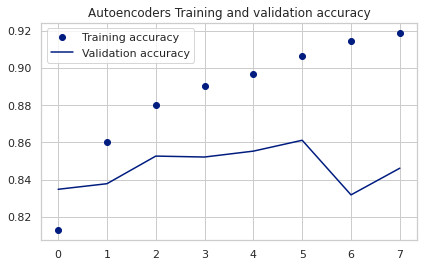

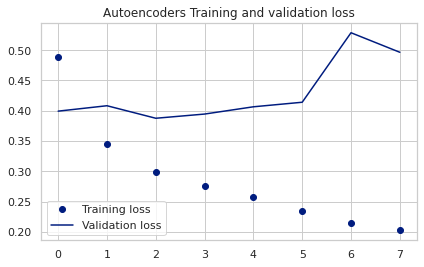

In [68]:

accuracy = ct.history['accuracy']
val_accuracy = ct.history['val_accuracy']
loss = ct.history['loss']
val_loss = ct.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Autoencoders Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Autoencoders Training and validation loss')
plt.legend()
plt.show()


In [71]:
predicted_final = final_model.predict(test_data)
predicted_final

array([[7.1319423e-24, 5.8364993e-12, 2.9393942e-07, 2.7709794e-01,
        7.2290176e-01],
       [2.0660177e-23, 7.6158972e-16, 2.7597428e-08, 1.3044834e-04,
        9.9986947e-01],
       [3.8850400e-01, 2.7956086e-01, 3.3193481e-01, 2.5073319e-07,
        1.1895641e-09],
       ...,
       [7.1436899e-17, 7.6940249e-10, 9.8161176e-03, 1.1675134e-01,
        8.7343246e-01],
       [5.3742379e-03, 6.7512143e-01, 3.1869197e-01, 8.1228046e-04,
        7.7666826e-08],
       [8.2900613e-13, 4.9993258e-07, 2.4868938e-01, 7.5105208e-01,
        2.5801625e-04]], dtype=float32)

In [72]:
predicted_classes = np.argmax(np.round(predicted_final),axis=1)
predicted_classes

array([4, 4, 0, ..., 4, 1, 3])

In [73]:
ae_scores = final_model.evaluate(valid_3, valid_label, verbose=1)
print('Validation loss:', ae_scores[0])
print('Validation accuracy:', ae_scores[1])

6000/6000 [==============================] - 1s 217us/step
Validation loss: 0.44058982835213345
Validation accuracy: 0.859000027179718


In [74]:
prediction_ae = pd.DataFrame(predicted_classes, columns=['Label'])
prediction_ae

,Label
0,4
1,4
2,0
3,1
4,3
...,...
9995,3
9996,1
9997,4
9998,1


In [75]:
dataset_autoencoders = [data_test['Id'],prediction_ae]
final_df_autoencoders = pd.concat(dataset_autoencoders,axis=1)
final_df_autoencoders

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,3
...,...,...
9995,9995,3
9996,9996,1
9997,9997,4
9998,9998,1


In [0]:
from google.colab import files

final_df_autoencoders.to_csv('sample_autoencoders.csv',index=False, header=True)
files.download('sample_autoencoders.csv')

In [77]:
# Classification Report
y_ae = final_model.predict(x_validate)
y_val_ae = np.argmax(y_ae, axis = 1)
labels = ['0', '1', '2', '3', '4']
print(classification_report(y_validate, y_val_ae, target_names = labels))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1190
           1       0.87      0.81      0.84      1230
           2       0.80      0.76      0.78      1182
           3       0.77      0.87      0.82      1175
           4       0.90      0.95      0.92      1223

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



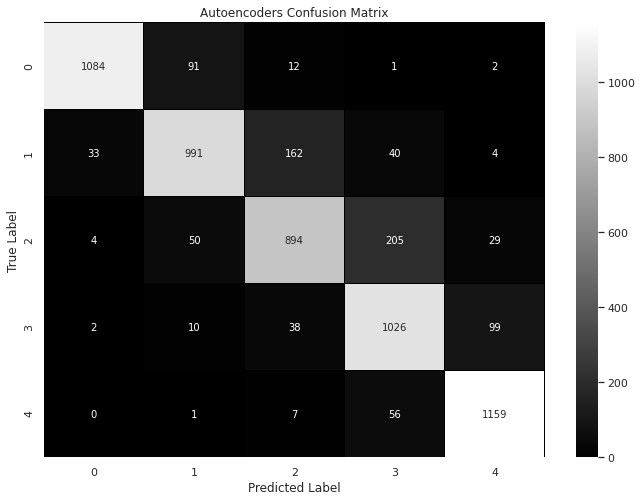

In [78]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_val_ae) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Autoencoders Confusion Matrix")
plt.show()

#### VGG16

In [0]:
#Importing libraries

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [74]:
data.shape

(60000, 786)

In [75]:
data.head()

,Id,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train = data.drop(['Id','Label'],axis=1)

In [77]:
train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,76,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,31,52,98,94,86,94,84,53,89,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,178,196,...,80,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,149,59,0,0,57,137,91,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,0,0,0,30,69,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,241,221,229,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,99,117,135,137,135,120,101,27,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,0,164,137,130,93,136,138,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,...,249,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,206,85,0,94,202,14,0,0,0,0,0,0,0,0,0,0


In [78]:
data_test.shape

(10000, 785)

In [0]:
test = data_test.drop('Id', axis = 1)

In [80]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [0]:
train_vgg = train
train_Y_vgg = data['Label']
test_vgg = test

In [82]:
train_vgg.shape

(60000, 784)

In [83]:
train_Y_vgg.shape

(60000,)

In [84]:
test_vgg.shape

(10000, 784)

In [85]:
classes = np.unique(train_Y_vgg)
num_classes = len(classes)
num_classes

5

In [86]:
# Convert the images into 3 channels
train_vgg = np.dstack([train_vgg] * 3)
test_vgg = np.dstack([test_vgg]*3)
train_vgg.shape,test_vgg.shape

((60000, 784, 3), (10000, 784, 3))

In [87]:
# Reshape images as per the tensor format required by tensorflow
train_vgg = train_vgg.reshape(-1, 28,28,3)
test_vgg= test_vgg.reshape (-1,28,28,3)
train_vgg.shape,test_vgg.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [88]:
# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img

train_vgg = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_vgg])
test_vgg = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_vgg])
#train_x = preprocess_input(x)
train_vgg.shape, test_vgg.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [0]:
# Normalise the data and change data type
train_vgg = train_vgg / 255.
test_vgg = test_vgg / 255.
train_vgg = train_vgg.astype('float32')
test_vgg = test_vgg.astype('float32')

In [0]:
# Converting Labels to one hot encoded format
train_Y_one_hot = to_categorical(train_Y_vgg)

In [0]:
# Splitting train data as train and validation data
train_vgg,valid_vgg,tl,vl = train_test_split(train_vgg,
                                             train_Y_one_hot,
                                             test_size=0.1,
                                             random_state=42
                                              )

In [92]:
# Finally check the data size whether it is as per tensorflow and VGG16 requirement
train_vgg.shape,valid_vgg.shape,tl.shape,vl.shape

((54000, 48, 48, 3), (6000, 48, 48, 3), (54000, 5), (6000, 5))

In [0]:
# Define the parameters for instanitaing VGG16 model. 
Image_width = 48
Image_height = 48
Image_depth = 3
batch_size = 16

# Preprocessing the input 
train_vgg = preprocess_input(train_vgg)
valid_vgg = preprocess_input(valid_vgg)
test_vgg  = preprocess_input (test_vgg)

In [94]:
#  Create base model of VGG16
base_model_vgg = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(Image_height, Image_width, Image_depth)
                 )


58892288/58889256 [==============================] - 2s 0us/step


In [95]:
base_model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [96]:
# Extracting features

features_train = base_model_vgg.predict(np.array(train_vgg), batch_size=batch_size, verbose=1)

features_test = base_model_vgg.predict(np.array(test_vgg), batch_size=batch_size, verbose=1)

features_val = base_model_vgg.predict(np.array(valid_vgg), batch_size=batch_size, verbose=1)

6000/6000 [==============================] - 4s 705us/step


In [0]:
# Saving the features so that they can be used for future
np.savez("train_features", features_train, tl)
# np.savez("test_features", test_features, test_Y)
np.savez("val_features", features_val, vl)

In [98]:
print(features_train.shape, "\n", features_val.shape)

(54000, 1, 1, 512) 
 (6000, 1, 1, 512)


In [0]:
# Flatten extracted features
flat_features_train = np.reshape(features_train, (54000, 1*1*512))
# test_features_flat = np.reshape(test_features, (10000, 1*1*512))
flat_features_val = np.reshape(features_val, (6000, 1*1*512))

In [0]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

# 7.0 Define the densely connected classifier followed by leakyrelu layer and finally dense layer for the number of classes
train_samples = flat_features_train.shape[0]
validation_samples = flat_features_val.shape[0]
epochs = 100

vgg_model = models.Sequential()
vgg_model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
vgg_model.add(layers.LeakyReLU(alpha=0.1))
vgg_model.add(layers.Dense(num_classes, activation='softmax'))

In [0]:
# Compile the model.
vgg = vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc']
    )

In [0]:
# Incorporating reduced learning and early stopping for callback
reduced_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduced_learning, early_stopping]

In [103]:
# Train the the model
hist_vgg = vgg_model.fit(
    flat_features_train,
    tl,
    epochs=epochs,
    validation_data=(flat_features_val, vl),
    callbacks=callbacks
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 6s 104us/step - loss: 1.3266 - acc: 0.4151 - val_loss: 1.3507 - val_acc: 0.3952
Epoch 2/100
54000/54000 [==============================] - 5s 98us/step - loss: 1.1294 - acc: 0.5026 - val_loss: 1.1049 - val_acc: 0.5005
Epoch 3/100
54000/54000 [==============================] - 5s 96us/step - loss: 1.0468 - acc: 0.5425 - val_loss: 1.0139 - val_acc: 0.5510
Epoch 4/100
54000/54000 [==============================] - 5s 94us/step - loss: 0.9988 - acc: 0.5694 - val_loss: 0.9576 - val_acc: 0.5947
Epoch 5/100
54000/54000 [==============================] - 5s 97us/step - loss: 0.9662 - acc: 0.5891 - val_loss: 0.9262 - val_acc: 0.6128
Epoch 6/100
54000/54000 [==============================] - 5s 98us/step - loss: 0.9366 - acc: 0.6052 - val_loss: 0.9193 - val_acc: 0.6223
Epoch 7/100
54000/54000 [==============================] - 5s 96us/step - loss: 0.9135 - acc: 0.6175 - val_loss: 0.9075 - 

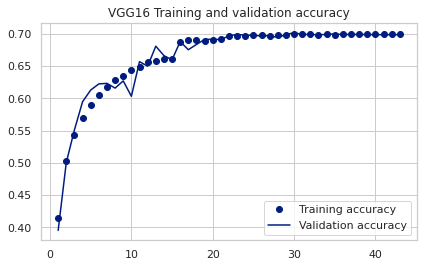

In [104]:
# Plotting the training and validation accuracy

accuracy = hist_vgg.history['acc']
val_accuracy = hist_vgg.history['val_acc']
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('VGG16 Training and validation accuracy')
plt.legend()
plt.show()

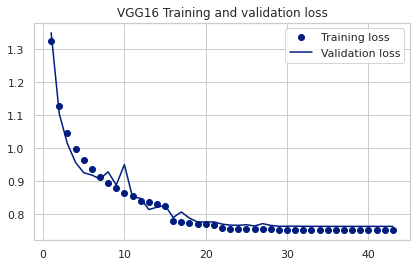

In [105]:
# Plotting the training and validation loss
loss = hist_vgg.history['loss']
val_loss = hist_vgg.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('VGG16 Training and validation loss')
plt.legend()
plt.show()

In [0]:
y_pred = vgg_model.predict(flat_features_val)

In [134]:
y_pred

array([[8.6626786e-01, 1.3294931e-01, 4.4548971e-04, 2.7756731e-04,
        5.9778089e-05],
       [3.1339413e-01, 5.6140304e-01, 9.2143312e-02, 8.8192187e-03,
        2.4240298e-02],
       [2.0961095e-05, 9.9637613e-02, 3.9494634e-01, 4.7802994e-01,
        2.7365169e-02],
       ...,
       [8.0873324e-06, 8.2197025e-02, 1.6425164e-01, 7.4029869e-01,
        1.3244563e-02],
       [7.7587438e-01, 1.7623584e-01, 4.5549784e-02, 1.4335673e-03,
        9.0639800e-04],
       [9.3234545e-03, 1.0770402e-01, 7.4641830e-01, 1.2822367e-01,
        8.3305864e-03]], dtype=float32)

In [135]:
vl

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [136]:
print(classification_report(np.argmax(vl, axis = 1),np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1190
           1       0.66      0.65      0.66      1230
           2       0.58      0.55      0.56      1182
           3       0.65      0.67      0.66      1175
           4       0.79      0.76      0.78      1223

    accuracy                           0.70      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.70      0.70      0.70      6000



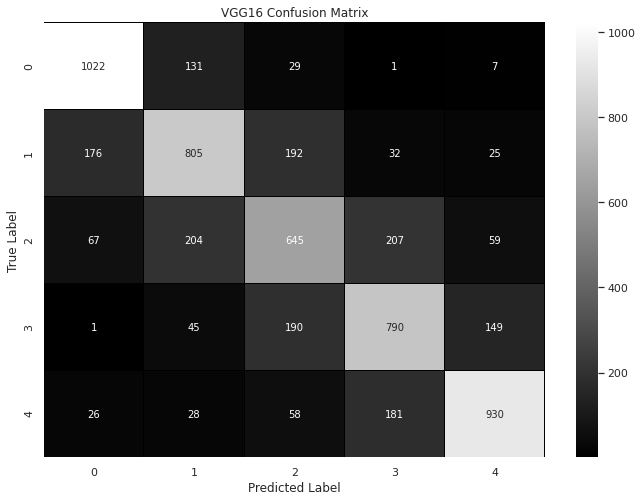

In [138]:
# Confusion matrix

confusion_mtx = confusion_matrix(np.argmax(vl, axis = 1),np.argmax(y_pred, axis = 1)) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("VGG16 Confusion Matrix")
plt.show()

#### Data Augmentation

In [0]:
train_aug = pd.read_csv('/content/drive/My Drive/train.csv')
test_aug = pd.read_csv('/content/drive/My Drive/testX.csv')

In [114]:
# Transform Train and Test into images\labels.
x_train_aug = train_aug.drop(['Label','Id'], axis=1).values.astype('float32') # all pixel values
y_train_aug = train_aug['Label'].values.astype('int32') # only labels i.e targets digits
x_test_aug = test_aug.drop(['Id'], axis=1).values.astype('float32')
x_train_aug = x_train_aug.reshape(x_train_aug.shape[0], 28, 28) / 255.0
x_test_aug = x_test_aug.reshape(x_test_aug.shape[0], 28, 28) / 255.0

x_train_aug, x_val_aug, y_train_aug, y_val_aug = train_test_split(x_train_aug, y_train_aug, test_size = 0.11, random_state=42)

print(x_train_aug.shape)
print(x_val_aug.shape)
print(y_train_aug.shape)
print(x_test_aug.shape)

(53400, 28, 28)
(6600, 28, 28)
(53400,)
(10000, 28, 28)


In [115]:
x_train_aug = x_train_aug.reshape(x_train_aug.shape[0], 28, 28,1)  
x_val_aug = x_val_aug.reshape(x_val_aug.shape[0], 28, 28,1)  
x_test_aug = x_test_aug.reshape(x_test_aug.shape[0], 28, 28,1) 
print("Train size:{}\nvalidation size:{}\nTest size:{}".format(x_train_aug.shape,x_val_aug.shape, x_test_aug.shape))

mean_px = x_train_aug.mean().astype(np.float32)
std_px = x_train_aug.std().astype(np.float32)

Train size:(53400, 28, 28, 1)
validation size:(6600, 28, 28, 1)
Test size:(10000, 28, 28, 1)


In [116]:
from tensorflow.python.keras.layers import Input , Dense , Conv2D , Activation , Add,ReLU,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.python.keras.models import Model

input = Input(shape=[28, 28, 1])
x = Conv2D(32, (5, 5), strides=1, padding='same')(input)
x = Activation('relu')(x)
x = Conv2D(32, (5, 5), strides=1, padding='same')(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = Dropout (0.25)(x)
x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = Dropout (0.35)(x)
x = Flatten()(x)
x = Dense(200)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dense(5)(x)
x = Activation('softmax')(x)

model_aug = Model(inputs = input, outputs =x)
print(model_aug.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0     

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []

    def on_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['accuracy'])

batch_stats = CollectBatchStats()

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.python.keras.optimizers import Adam ,RMSprop

epochs = 100
Learning_rate = 0.001
decay= 5 * Learning_rate / epochs

optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)


model_aug.compile(optimizer=keras.optimizers.RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=0.00005)


In [0]:
# Data augmentation

aug_num = 10 
datagen = ImageDataGenerator(
        featurewise_center=False,
# set each sample mean to 0
        samplewise_center=False,  
# divide inputs by std of the dataset
        featurewise_std_normalization=False, 
# divide each input by its std
        samplewise_std_normalization=False,
# apply ZCA whitening  
        zca_whitening=False,  
# randomly rotate images in the range (degrees, 0 to 180)
        rotation_range= 0.8,
# Randomly zoom image   
        zoom_range = aug_num / 100, 
# randomly shift images horizontally (fraction of total width)
        width_shift_range= aug_num / 100,
# randomly shift images vertically (fraction of total height)  
        height_shift_range= aug_num / 100,  
# randomly flip images horizontally
        horizontal_flip=0.05,  
        vertical_flip=False)  # 

In [120]:
datagen.fit(x_train_aug)
batch_size = 256
checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history_aug = model_aug.fit_generator(datagen.flow(x_train_aug,y_train_aug, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val_aug,y_val_aug),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model_aug.load_weights("best_weights.hdf5") 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
209/210 [============================>.] - ETA: 0s - loss: 0.8388 - accuracy: 0.6352
Epoch 00001: val_accuracy improved from -inf to 0.46803, saving model to best_weights.hdf5
210/210 [==============================] - 16s 76ms/step - loss: 0.8389 - accuracy: 0.6351 - val_loss: 1.1533 - val_accuracy: 0.4680 - lr: 0.0010
Epoch 2/100
210/210 [==============================] - ETA: 0s - loss: 0.6147 - accuracy: 0.7434
Epoch 00002: val_accuracy improved from 0.46803 to 0.75348, saving model to best_weights.hdf5
210/210 [==============================] - 16s 76ms/step - loss: 0.6147 - accuracy: 0.7434 - val_loss: 0.6005 - val_accuracy: 0.7535 - lr: 0.0010
Epoch 3/100
210/210 [==============================] - ETA: 0s - loss: 0.5524 - accuracy: 0.7698
Epoch 00003: val_accuracy did not improve from 0.75348
210/210 [==============================] - 16s 75ms/step - loss: 0.5524 - accuracy: 0.7698 - val_loss

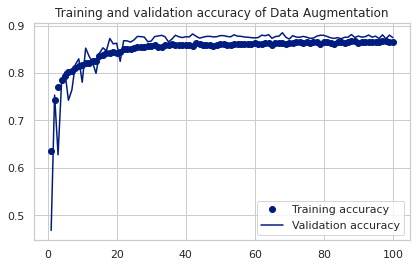

In [121]:
# Plotting the training and validation accuracy

accuracy = history_aug.history['accuracy']
val_accuracy = history_aug.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of Data Augmentation')
plt.legend()
plt.show()

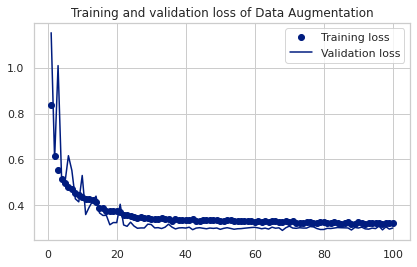

In [122]:
# Plotting the training and validation loss

loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss of Data Augmentation')
plt.legend()
plt.show()

In [0]:
y_pred = model_aug.predict(x_val_aug)

In [140]:
y_pred

array([[2.2828029e-01, 7.6671565e-01, 4.0015751e-03, 7.3933089e-04,
        2.6321234e-04],
       [8.8821757e-01, 1.1144579e-01, 3.2288022e-04, 2.4683366e-06,
        1.1382113e-05],
       [3.8150384e-07, 1.7973142e-04, 6.6507232e-01, 3.3473679e-01,
        1.0783350e-05],
       ...,
       [4.2102672e-04, 1.7859241e-03, 5.7078767e-01, 2.9764584e-01,
        1.2935950e-01],
       [6.8254977e-08, 3.5827516e-06, 7.5094475e-05, 9.5861766e-04,
        9.9896264e-01],
       [2.9842423e-10, 6.7768222e-09, 6.2609075e-08, 3.3258519e-07,
        9.9999964e-01]], dtype=float32)

In [141]:
y_val_aug

array([1, 0, 2, ..., 2, 4, 4], dtype=int32)

In [142]:
print(classification_report(np.argma x(y_pred, axis = 1),y_val_aug))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1301
           1       0.87      0.87      0.87      1336
           2       0.82      0.84      0.83      1294
           3       0.89      0.81      0.85      1393
           4       0.90      0.95      0.92      1276

    accuracy                           0.89      6600
   macro avg       0.89      0.89      0.89      6600
weighted avg       0.89      0.89      0.88      6600



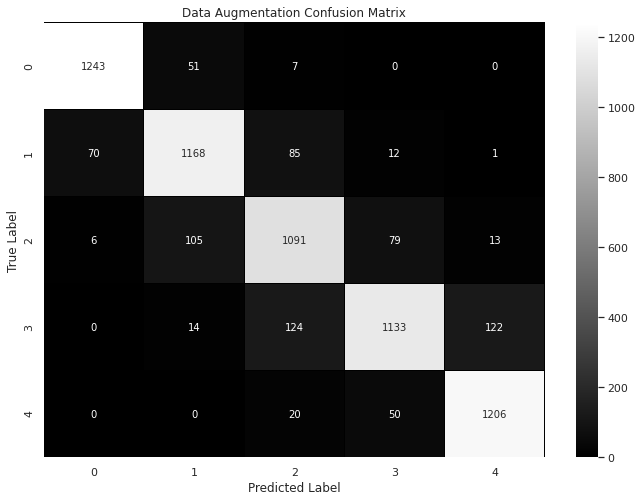

In [145]:
# Confusion matrix

confusion_mtx = confusion_matrix(np.argmax(y_pred, axis = 1),y_val_aug) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Data Augmentation Confusion Matrix")
plt.show()

In [143]:
# Predicting the result for the test data

pred_aug = model_aug.predict(x_test_aug)

test_classes = pred_aug.argmax(axis=-1)
test_classes

array([3, 4, 1, ..., 3, 2, 3])

In [149]:
# Saving the output to the csv

predict_aug = pd.DataFrame(test_classes, columns=['Label'])
dataset_aug = [test_aug['Id'],predict_aug]
final_df_aug = pd.concat(dataset_aug,axis=1)

print(final_df_aug)

from google.colab import files

final_df_aug.to_csv('aug.csv',index=False, header=True)
files.download('aug.csv')

        Id  Label
0        0      3
1        1      4
2        2      1
3        3      1
4        4      3
...    ...    ...
9995  9995      1
9996  9996      1
9997  9997      3
9998  9998      2
9999  9999      3

[10000 rows x 2 columns]
